<a href="https://colab.research.google.com/github/joe-from-mtl/teaching/blob/main/notebooks/inf8240-images/inf8240_01_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INF8240 - 01 - Images numériques
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/joe-from-mtl/teaching/blob/main/notebooks/inf8240-images/inf8240_01_introduction.ipynb)

In [1]:
import imageio 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import skimage

In [9]:
# Ouvrir d'un volume échantillon
vol = skimage.data.brain()

In [10]:
# Affichage des informations de base sur l'image
print("Type: ", type(vol))
print("Dimension: ", vol.ndim)
print("Taille: ", vol.shape)
print("Format: ", vol.dtype)
print("Valeurs min/max: ", f"{vol.min()}/{vol.max()}")

Type:  <class 'numpy.ndarray'>
Dimension:  3
Taille:  (10, 256, 256)
Format:  uint16
Valeurs min/max:  0/51076


In [16]:
# Extraction d'une image à partir du volume
z = 0
img = vol[z, ...] # syntaxe équivalente : vol[z, :, :]

print("Type: ", type(img))
print("Dimension: ", img.ndim)
print("Taille: ", img.shape)

Type:  <class 'numpy.ndarray'>
Dimension:  2
Taille:  (256, 256)


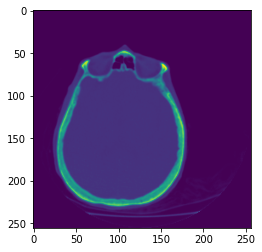

In [17]:
# Affichage de l'image avec matplotlib
plt.imshow(img)
plt.show()

In [19]:
# Affichage interactif avec plotly
fig = px.imshow(img)
fig.show()

In [25]:
# Manipulation des données
print(img[61,61]) # Ligne = Colonne = 61
print(img[45,105]) # Ligne = 45, Colonne = 105
print(img[105,45]) # Ligne = 105, Colonne = 45

43264
5776
25921


In [26]:
# Extraction d'une sous-région
x = 50
y = 50
width = 150
height = 50
roi = img[y:y+height, x:x+width]
fig = px.imshow(roi)
fig.show()

In [37]:
# Opération booléenne pour obtenir un image binaire
seuil = 20000
img_b = roi > seuil
fig = px.imshow(img_b)
fig.show()

In [38]:
# Transformation de distance
from scipy.ndimage import distance_transform_edt
img_dist = distance_transform_edt(img_b)
fig = px.imshow(img_dist)
fig.show()

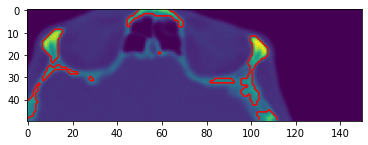

In [44]:
# Extraction d'un contour
from skimage.measure import find_contours
contours = find_contours(img_b)

plt.imshow(roi)
for c in range(len(contours)):
  plt.plot(contours[c][:,1], contours[c][:,0], color="r")
plt.show()

In [47]:
# Détecteur des bordures de Canny
from skimage.feature import canny
img_canny = canny(roi)
fig = px.imshow(img_canny)
fig.show()

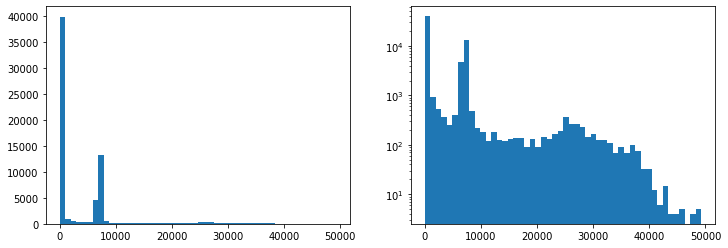

In [57]:
# Calcul de l'histogramme d'une image
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.hist(img.ravel(), bins=50)

plt.subplot(122)
plt.hist(img.ravel(), bins=50, log=True)
plt.show()

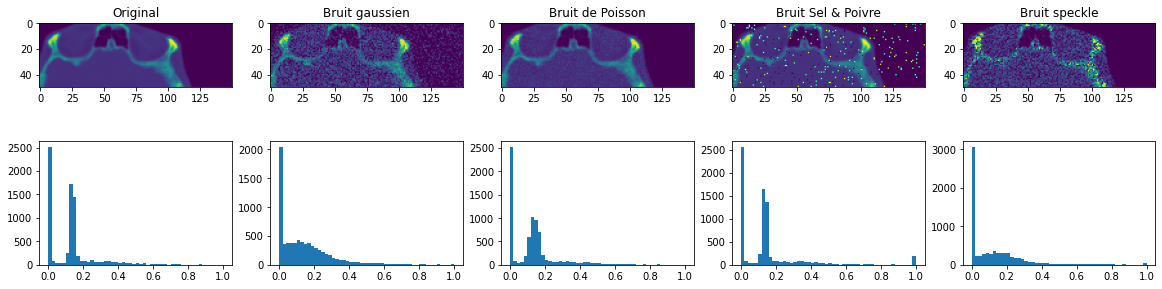

In [78]:
# Exemple de bruit
from skimage.util import random_noise
random_noise?

roi = roi.astype(np.float64) # Convertion en float
roi = (roi - roi.min()) / (roi.max() - roi.min()) # Normalisation
roi_gaussian = random_noise(roi, mode="gaussian")
roi_poisson = random_noise(roi, mode="poisson")
roi_sp = random_noise(roi, mode="s&p")
roi_speckle = random_noise(roi, mode="speckle", var=0.5)

plt.figure(figsize=(20,5))
plt.subplot(251); plt.imshow(roi); plt.title("Original")
plt.subplot(256); plt.hist(roi.ravel(), bins=50)

plt.subplot(252); plt.imshow(roi_gaussian); plt.title("Bruit gaussien")
plt.subplot(257); plt.hist(roi_gaussian.ravel(), bins=50)

plt.subplot(253); plt.imshow(roi_poisson); plt.title("Bruit de Poisson")
plt.subplot(258); plt.hist(roi_poisson.ravel(), bins=50)

plt.subplot(254); plt.imshow(roi_sp); plt.title("Bruit Sel & Poivre")
plt.subplot(259); plt.hist(roi_sp.ravel(), bins=50)

plt.subplot(255); plt.imshow(roi_speckle); plt.title("Bruit speckle")
plt.subplot(2,5,10); plt.hist(roi_speckle.ravel(), bins=50)

plt.show()



In [79]:
# Évaluation de la différence entre des images
from skimage import metrics

# Erreur quadratique moyenne
print("RMSE")
print("RMSE (gaussian):", metrics.normalized_root_mse(roi, roi_gaussian))
print("RMSE (poisson):", metrics.normalized_root_mse(roi, roi_poisson))
print("RMSE (s&p):", metrics.normalized_root_mse(roi, roi_sp))
print("RMSE (speckle):", metrics.normalized_root_mse(roi, roi_speckle))


# PSNR 
print("PSNR")
print("PSNR (gaussian):", metrics.peak_signal_noise_ratio(roi, roi_gaussian))
print("PSNR (poisson):", metrics.peak_signal_noise_ratio(roi, roi_poisson))
print("PSNR (s&p):", metrics.peak_signal_noise_ratio(roi, roi_sp))
print("PSNR (speckle):", metrics.peak_signal_noise_ratio(roi, roi_speckle))


RMSE
RMSE (gaussian): 0.45282115473774515
RMSE (poisson): 0.11746245755445622
RMSE (s&p): 0.7406713083757096
RMSE (speckle): 0.604600391921991
PSNR
PSNR (gaussian): 21.204473240692124
PSNR (poisson): 32.92502573949334
PSNR (s&p): 16.930496966650548
PSNR (speckle): 18.693638910760917


In [22]:
# Affichage d'un volume avec plotly
# https://plotly.com/python/imshow
fig = px.imshow(vol, animation_frame=0, color_continuous_scale='gray')
fig.show()